# Metrics

Metrics are a way to assess a models performance. The assessment is done on the test data vs model preditions.
This notebook will go over some commonly used metrics:

1) Classification metrics

2) Regression metrics

In [27]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Classification Metrics

#### Accuracy:

$\frac{\text{n correct predictions}}{\text{n all predictions}}$

In [6]:
y_true = np.array([0, 1, 1, 2, 0, 1, 2, 2, 0, 2])
y_pred = np.array([0, 1, 0, 2, 0, 1, 2, 1, 0, 2])

# 8 out of 10 are correctly classified

accuracy = np.mean([y_true == y_pred])
print(accuracy)

0.8


The next ones are for binary classification. If we want to use them for multi-class cases, we do it serparately for each class and average the results (or weighted average based on the number of samples in a class)

#### Confusion matrix:

$\begin{bmatrix} TP & FN \\ FP & TN \end{bmatrix}$



In [32]:
y_true = np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

conf_mat = np.array([[TP, FN], [FP, TN]])
print(conf_mat)

[[3 2]
 [1 4]]


#### Precision:

Tells us the ratio of true positives to all that we predict as positive. Basically, it's high when there are few false positives.

Good use case: email spam filter (because we don't want to mark important emails as spam)

$\frac{TP}{TP+FP}$

In [33]:
precision = TP/(TP + FP)
print(precision)

0.75


#### Recall (or sensitivity)

Tells us the ratio of true positives to all that were actually positive. Basically, it's high when there are few false negatives.

Good use case: medical screening (we don't want to miss a sick patient)

$\frac{TP}{TP+FN}$

In [34]:
recall = TP/(TP + FN)
print(recall)

0.6


#### Specificity

Like recall but for the negative class. High when there are few false positives.

Good use case: videogame anti-cheat (we don't want to false ban anyone)

$\frac{TN}{TN+FP}$

In [35]:
specificity = TN/(TN + FP)
print(specificity)

0.8


#### F1 Score

Harmonic mean of the precision and recall

Good use cases: imbalanced classes, need a good balance between precision and recall

$\frac{2TP}{2TP + FP + FN}=2\frac{P \cdot R}{P + R}$

In [22]:
f1 = 2*TP/(2*TP + FP + FN)
print(f1)

0.6666666666666666


#### ROC and AUC

When the predictions are in the form of continous values (for example probabilities, P(positive) = 0.80), we can draw a ROC curve by setting thresholds for this probability $\alpha \in [0, 1]$.

For each threshold, we classify samples as positive if their predicted probability is greater than $\alpha$. We then compute:

True Positive Rate (TPR) $=$ Recall $=TP/(TP+FN)$

False Positive Rate (FPR) $=$ 1-Specificity $=FP/(FP+TN)$

Plotting TPR vs. FPR for all thresholds produces the ROC curve.

AUC is the area under the curve. It is the models ability to seperate classes. Ideally we want it to be exactly 1. It's no better than random at 0.5

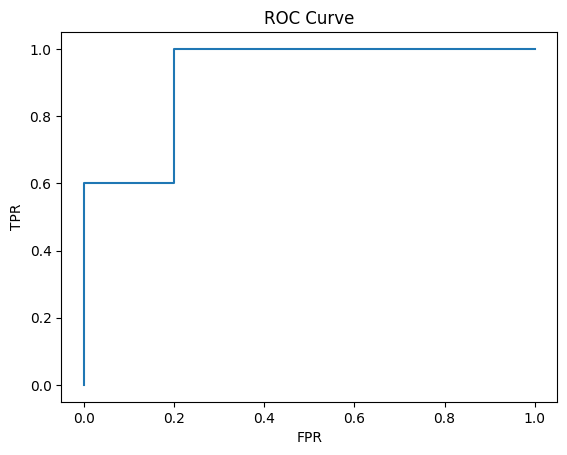

In [43]:
y_true = np.array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])
y_pred = np.array([0.06, 0.8, 0.45, 0.49, 0.12, 0.96, 0.85, 0.57, 0.3, 0.1])

alphas = np.linspace(1, 0, 100)

TPRs = []
FPRs = []

for alpha in alphas:
    y_pred_alpha = y_pred > alpha

    TP = np.sum((y_true == 1) & (y_pred_alpha == 1))
    TN = np.sum((y_true == 0) & (y_pred_alpha == 0))
    FP = np.sum((y_true == 0) & (y_pred_alpha == 1))
    FN = np.sum((y_true == 1) & (y_pred_alpha == 0))
    
    TPR = TP/(TP + FN)
    FPR = FP/(TN + FP)

    TPRs.append(TPR)
    FPRs.append(FPR)

plt.plot(FPRs, TPRs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [45]:
print("AUC:", np.trapezoid(TPRs, FPRs))

AUC: 0.9199999999999999


### 2) Regression Metrics

#### Mean Squared Error, Root Mean Squared Error and Mean Absolute Error

$MSE = \frac{1}{n}\sum_i (y_i-\hat{y}_i)^2$

$RMSE = \sqrt{MSE}$

$MAE = \frac{1}{n}\sum_i |(y_i-\hat{y}_i)|$

MSE and RMSE punish far off values more. MAE is more robust against outliers.

#### $R^2$

$R^2 = 1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum_i (y_i-\hat{y}_i)^2}{\sum_i (y_i-\bar{y}_i)^2}$

$R^2 = 1$, model predicts correctly every time

$R^2 = 0$, same as a model that just predicts the mean